In [ ]:
import os
import openpyxl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [87]:
BOLD = "\033[1m" 
RESET = "\033[0m" 

pd.set_option('display.max_columns', 50)

Lecture des données

In [4]:
filename = r"../data/2024_11_28_Data_V1.xlsx"
                        
df = pd.read_excel(filename,skiprows=[0])
df = df.iloc[:,:-2]
copy = df.copy()


### Types de données de chaque colonne

In [ ]:
df.dtypes

 Date de fab                                  object
 n°                                           object
 LOT Numero                                   object
 Diamètre axe planétaire avant assemblage     object
 Diamètre axe planétaire après assemblage     object
 Diamètre cible                               object
 Serrage                                     float64
 Rayons axes                                  object
 Accostage                                    object
 Emmanchement                                float64
 Ratio                                       float64
 Dégraissée                                   object
 Collé                                        object
 Graissée                                     object
-0.9                                         float64
-0.8                                         float64
-0.7                                          object
-0.6                                          object
-0.5                                          

In [6]:
df[0.5].value_counts()

0.5
x        7
70.44    1
Name: count, dtype: int64

In [7]:
df.describe()

,Serrage,Emmanchement,Ratio,-0.9,-0.8
count,71.000000,177.000000,177.000000,0.0,0.0
mean,0.071169,525.817078,1.669581,NaN,NaN
std,0.001867,63.884221,0.278050,NaN,NaN
min,0.069000,394.480000,1.065015,NaN,NaN
25%,0.070000,494.000000,1.480000,NaN,NaN
50%,0.071000,519.000000,1.706215,NaN,NaN
75%,0.072000,542.000000,1.910112,NaN,NaN
max,0.076000,823.240000,2.150106,NaN,NaN


In [219]:
def convert_to_majority_type(df, column_name):
    type_counts = df[column_name].map(type).value_counts()
    print("distribution types de données\n", type_counts)

    majority_type = type_counts.idxmax()
    print("Type de données", majority_type)
    
    if majority_type == int:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')  
    elif majority_type == float:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  
    elif majority_type == str:
        df[column_name] = df[column_name].astype(str) 
    elif majority_type == np.datetime64:
        df[column_name] = pd.to_datetime(df[column_name], errors='coerce')  
    else:
        print(f"Non supporté: {majority_type}.")
        df[column_name] = None 
    
    return df

In [ ]:
for col in df.columns:
    try:
        df[col] = convert_to_majority_type(df,col)
    except Exception as e:
        print(e)
    

distribution types de données
 Date de fab
<class 'datetime.datetime'>    329
<class 'float'>                 15
<class 'str'>                    4
Name: count, dtype: int64
Type de données <class 'datetime.datetime'>
Non supporté: <class 'datetime.datetime'>.
Columns must be same length as key
distribution types de données
 n°
<class 'str'>      215
<class 'int'>      127
<class 'float'>      6
Name: count, dtype: int64
Type de données <class 'str'>
Columns must be same length as key
distribution types de données
 LOT Numero
<class 'str'>      236
<class 'float'>     93
<class 'int'>       19
Name: count, dtype: int64
Type de données <class 'str'>
Columns must be same length as key
distribution types de données
 Diamètre axe planétaire avant assemblage
<class 'float'>    347
<class 'str'>        1
Name: count, dtype: int64
Type de données <class 'float'>
Columns must be same length as key
distribution types de données
 Diamètre axe planétaire après assemblage
<class 'float'>    337
<c

In [32]:
types = [
    "Date",
    "Integer",
    "String",
    "Float",
    "Float",
    "Float",
    "Float",
    "String",
    "Float",
    "Float",
    "Float",
    "Float", # colonne Dégraissée 
    "Float", # colonne Collé 
    "Float", # colonne Graissée 
    "Float", # colonne Process Misalignment
    "Float",
    "Float",
    "Date"
]

columns_list = list(df.drop(df.columns[list(range(14,29))],axis=1).columns)
columns_list[14] = "Process Misalignment"

for k, v in zip(columns_list, types):
    print(f"Type de colonne {BOLD}{k}{RESET}: {v}\n")

Type de colonne Date de fab: Date

Type de colonne n°: Integer

Type de colonne LOT Numero: String

Type de colonne Diamètre axe planétaire avant assemblage: Float

Type de colonne Diamètre axe planétaire après assemblage: Float

Type de colonne Diamètre cible: Float

Type de colonne Serrage: Float

Type de colonne Rayons axes: String

Type de colonne Accostage: Float

Type de colonne Emmanchement: Float

Type de colonne Ratio: Float

Type de colonne Dégraissée: Float

Type de colonne Collé: Float

Type de colonne Graissée: Float

Type de colonne Process Misalignment: Float

Type de colonne Desalignement: Float

Type de colonne Torque test: Float

Type de colonne Date torque test: Date



Correction d'une erreur d'écriture dans la colonne "Torque test"

In [5]:
# Correction d'une erreur d'écriture:  de O.172 à 0.172 
df.iloc[80,-2] = 0.172

Affichage des valeurs statistiqeus des colonnes numériques

In [6]:
def plot_statistics(col):
    statistics = {
        'Moyen': round(col.mean(),2),
        'Valeur Median': round(col.median(),2),
        'STD': round(col.std(),2),
        'Min': round(col.min(),2),
        'Max': round(col.max(),2)
        # 'Taille': round(col.count(),2)
    }

    stats_df = pd.DataFrame(list(statistics.items()), columns=['Statistic', 'Value'])

    plt.figure(figsize=(8, 5))
    plt.bar(stats_df['Statistic'], stats_df['Value'])
    plt.title(f'Chiffres statistiques [Taille:{col.count()}]')
    plt.xlabel(col.name)
    plt.ylabel('Valeur')
    for i,v in enumerate(stats_df['Value']):
        plt.text(i,v,str(v),ha="center", va="bottom")
    # plt.text(1,5,f"Taille:{col.count()}")
    plt.tight_layout()
    plt.show()


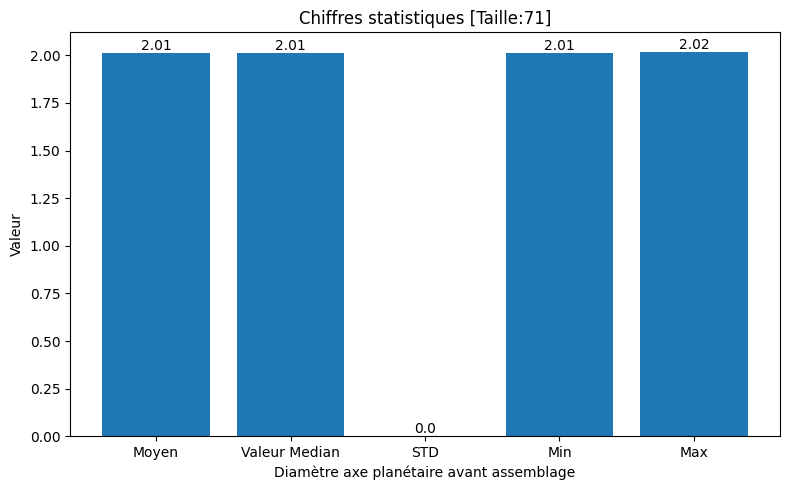

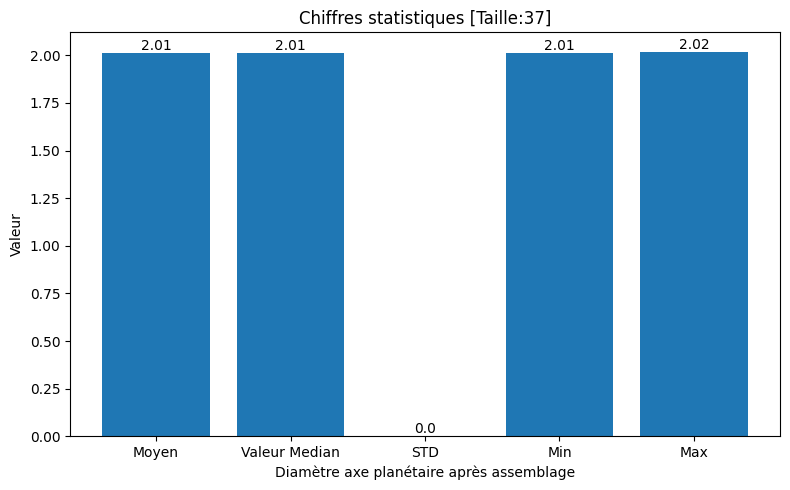

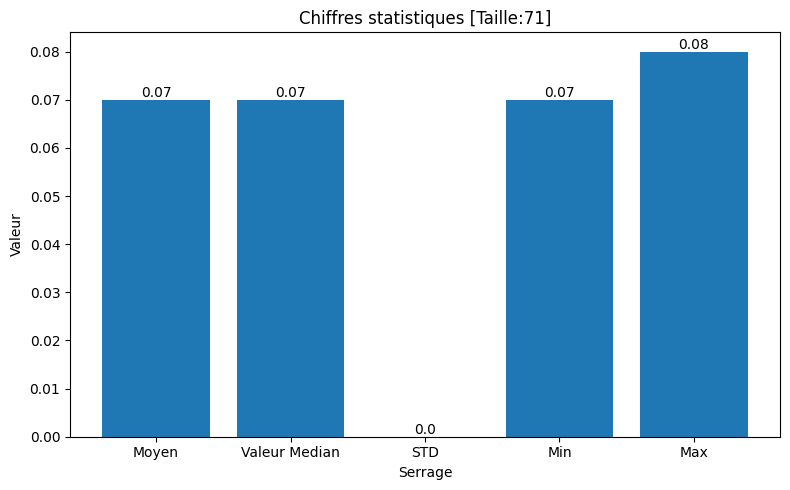

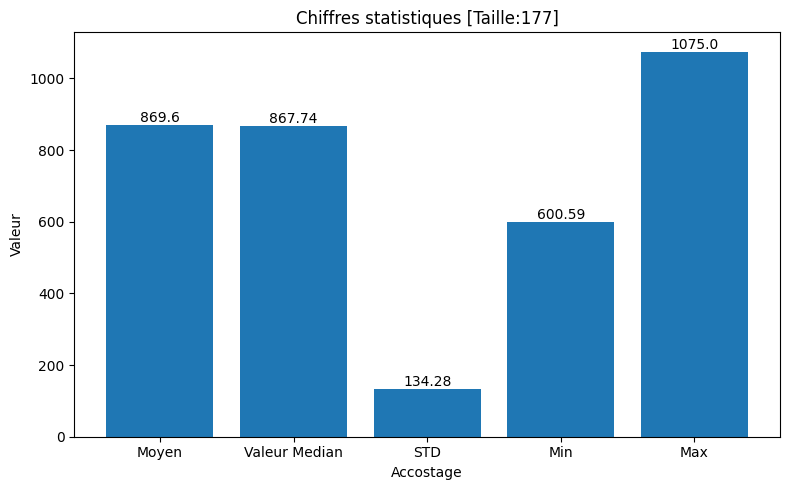

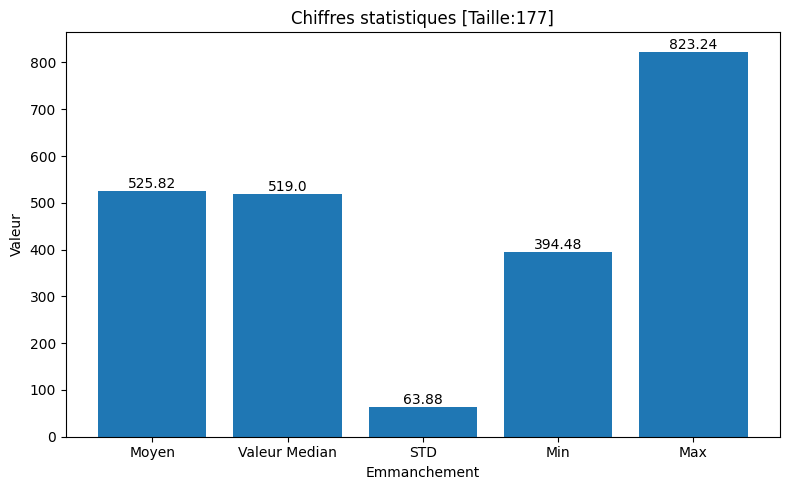

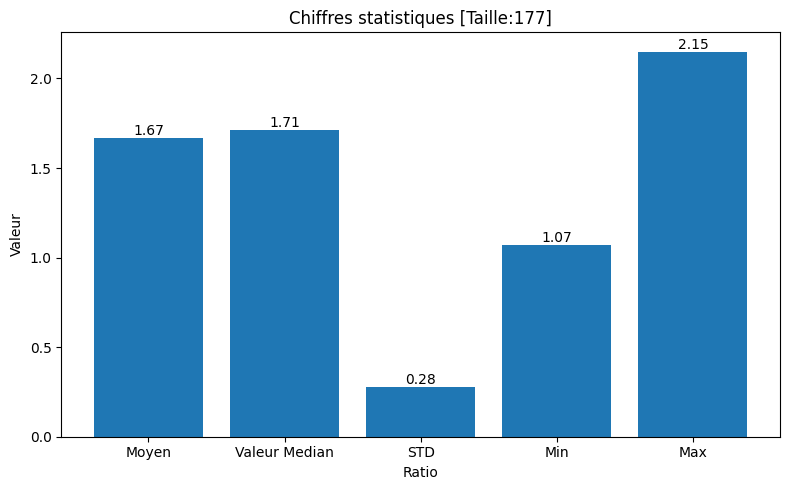

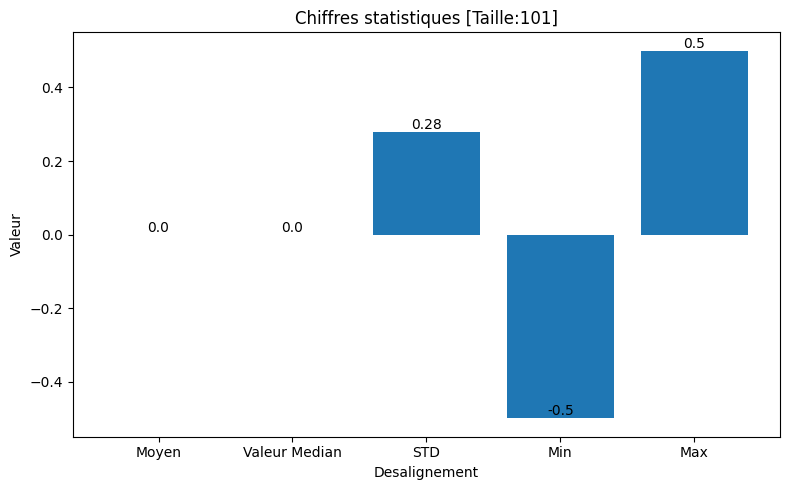

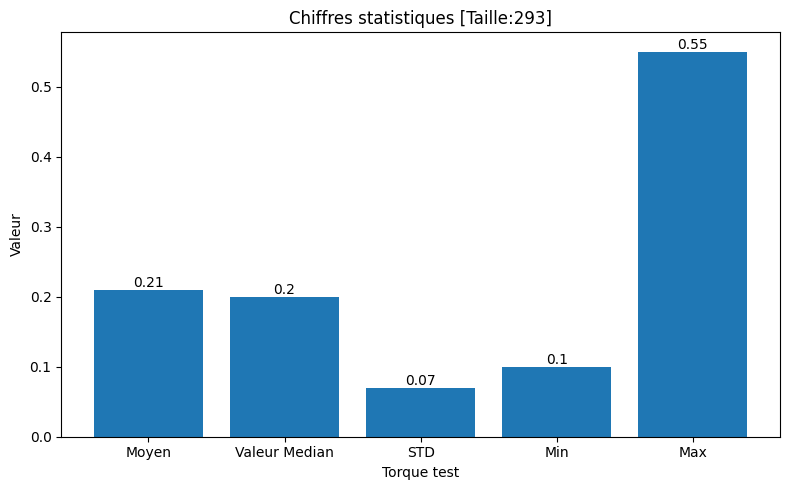

Diamètre axe planétaire avant assemblage    None
Diamètre axe planétaire après assemblage    None
Serrage                                     None
Accostage                                   None
Emmanchement                                None
Ratio                                       None
Desalignement                               None
Torque test                                 None
dtype: object

In [7]:
numerical_columns = [
    'Diamètre axe planétaire avant assemblage',
    'Diamètre axe planétaire après assemblage',
    'Serrage',
    'Accostage',
    'Emmanchement',
    'Ratio',
    'Desalignement',
    'Torque test'
    ]
copy = copy[numerical_columns]
copy = copy.apply(lambda x: pd.to_numeric(x, errors="coerce"))
copy.apply(plot_statistics)

In [8]:
copy.describe()

,Diamètre axe planétaire avant assemblage,Diamètre axe planétaire après assemblage,Serrage,Accostage,Emmanchement,Ratio,Desalignement,Torque test
count,71.000000,37.000000,71.000000,177.000000,177.000000,177.000000,101.000000,293.000000
mean,2.011169,2.012324,0.071169,869.603674,525.817078,1.669581,0.004455,0.211587
std,0.001867,0.002001,0.001867,134.284400,63.884221,0.278050,0.276776,0.071032
min,2.009000,2.009000,0.069000,600.590000,394.480000,1.065015,-0.500000,0.103000
25%,2.010000,2.011000,0.070000,742.060000,494.000000,1.480000,-0.200000,0.164000
50%,2.011000,2.012000,0.071000,867.740000,519.000000,1.706215,0.000000,0.200000
75%,2.012000,2.013000,0.072000,1003.000000,542.000000,1.910112,0.200000,0.240000
max,2.016000,2.017000,0.076000,1075.000000,823.240000,2.150106,0.500000,0.550000


## Distribution du misalignement

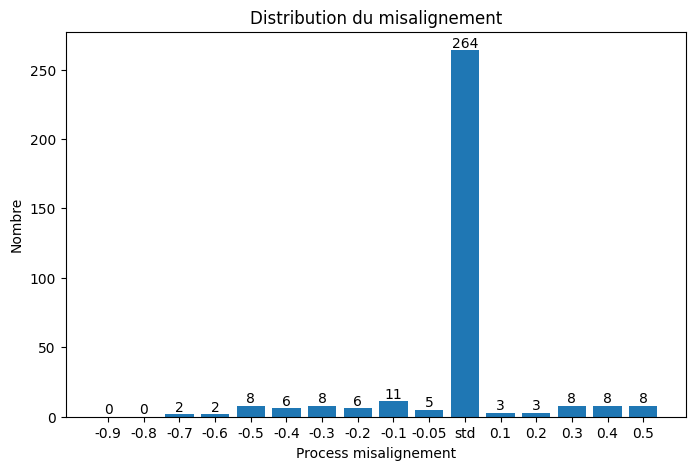

In [9]:

count_process_misalignment = df.iloc[:,14:30].count().to_dict()

count = pd.DataFrame(list(count_process_misalignment.items()), columns=['misalignement', 'count'])

plt.figure(figsize=(8, 5))
plt.bar(count['misalignement'].astype(str), count['count'])
for i,v in enumerate(count['count']):
    plt.text(i, v, str(v),ha='center', va='bottom')
plt.xlabel("Process misalignement")
plt.ylabel("Nombre")
plt.title("Distribution du misalignement")
plt.show()



#### Grand rayon VS Petit rayon

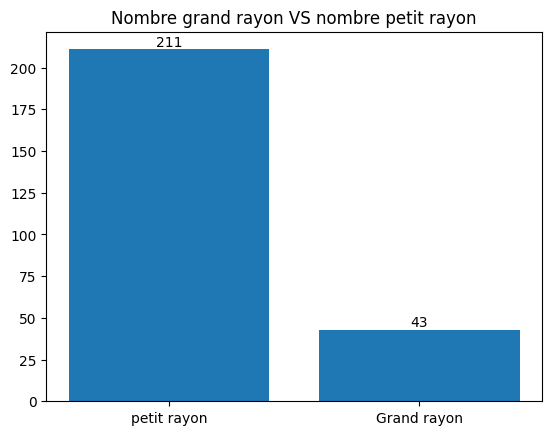

In [10]:
rayons = df["Rayons axes"][df["Rayons axes"]!="Moyenne"]
rayon_counts = rayons.value_counts()

plt.bar(rayon_counts.index, rayon_counts.values)
plt.title("Nombre grand rayon VS nombre petit rayon")
for i, v in enumerate(rayon_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()


Dégraissé, Collé, Graissé

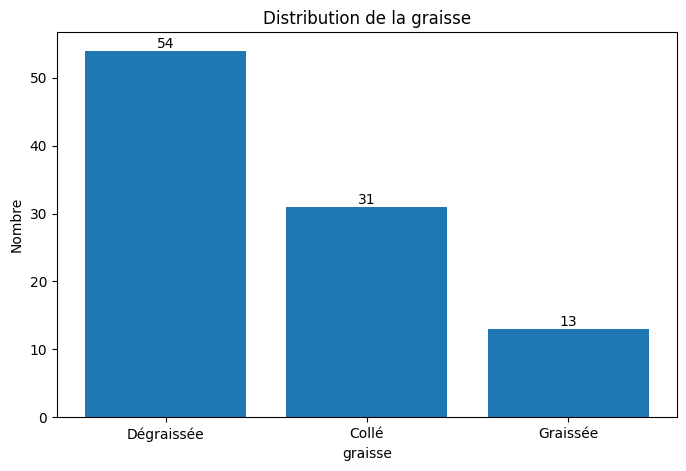

In [11]:
count_graiss = df.iloc[:,11:14].count().to_dict()

count = pd.DataFrame(list(count_graiss.items()), columns=['graisse', 'count'])

plt.figure(figsize=(8, 5))
plt.bar(count['graisse'].astype(str), count['count'])
for i,v in enumerate(count['count']):
    plt.text(i, v, str(v),ha='center', va='bottom')
plt.xlabel("graisse")
plt.ylabel("Nombre")
plt.title("Distribution de la graisse")
plt.show()

Combinaison des colones de processus en une colonne

In [176]:
filename = r"../data/2024_11_28_Data_V1.xlsx"
                        
df = pd.read_excel(filename,skiprows=[0])
df = df.iloc[:,:-2]
copy = df.copy()


In [177]:
copy.rename(columns={'std': 0}, inplace=True)
mis_df = copy.iloc[:,14:30].notnull()

non_null_indices = {col: mis_df.index[copy[col].notna()].tolist() for col in mis_df.columns}

STD_VALUE = 69.94
non_null_valeur = [round(STD_VALUE + val,2) for val in non_null_indices]


In [178]:
key_mapping = {old_key : new_key for old_key, new_key in zip(non_null_indices.keys(), non_null_valeur)} 

for old_key, new_key in key_mapping.items():
    non_null_indices[new_key] = non_null_indices.pop(old_key)
non_null_indices

{69.04: [],
 69.14: [],
 69.24: [339, 342],
 69.34: [341, 347],
 69.44: [47, 48, 49, 88, 89, 90, 344, 346],
 69.54: [50, 51, 52, 85, 86, 87],
 69.64: [13, 14, 53, 54, 55, 82, 83, 84],
 69.74: [10, 11, 12, 79, 80, 81],
 69.84: [5, 6, 7, 8, 9, 76, 77, 78, 340, 343, 345],
 69.89: [0, 1, 2, 3, 4],
 69.94: [21,
  22,
  23,
  24,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  65,
  66,
  67,
  68,
  69,
  71,
  72,
  73,
  74,
  75,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  

In [179]:
copy['Processus Misalignment'] = 0 * len(df)
for k, v in non_null_indices.items():
    if v != None:
        copy.loc[v, 'Processus Misalignment'] = k

copy['Processus Misalignment'][copy['Processus Misalignment']==0] = np.nan

df['Processus Misalignment'] = copy['Processus Misalignment']

C:\Users\zhangx\AppData\Local\Temp\ipykernel_14604\997487251.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.24' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  copy.loc[v, 'Processus Misalignment'] = k
C:\Users\zhangx\AppData\Local\Temp\ipykernel_14604\997487251.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a

Combinaison des colonnes Dégraissé, Collé, Graissé en une colonne

In [ ]:
copy = df.copy()

In [ ]:
copy.rename(columns={-0.9:"Normal"},inplace=True)
gra_df = copy.iloc[:,11:15].notnull()

non_null_indices = {col: gra_df.index[copy[col].notna()].tolist() for col in gra_df.columns}
non_null_indices

{'Dégraissée': [27,
  28,
  29,
  30,
  31,
  32,
  107,
  108,
  109,
  110,
  111,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  146,
  147,
  148,
  149,
  150,
  288,
  289,
  290,
  291,
  292,
  293,
  294,
  295,
  296,
  297,
  298,
  322,
  328],
 'Collé': [33,
  34,
  35,
  36,
  37,
  38,
  110,
  111,
  112,
  113,
  114,
  115,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  288,
  290,
  291,
  292,
  293,
  294,
  295,
  297,
  298],
 'Graissée': [39, 40, 41, 42, 43, 44, 112, 113, 114, 115, 116, 288, 298],
 'Normal': []}

In [ ]:
new_keys = [0,1,2,3]
key_mapping = {old_key : new_key for old_key, new_key in zip(non_null_indices.keys(), new_keys)} 

for old_key, new_key in key_mapping.items():
    non_null_indices[new_key] = non_null_indices.pop(old_key)


In [183]:
non_null_indices[3] = [_ for _ in range(len(df))]
value_set = [set(v) for k, v in non_null_indices.items()]
value_set[3] = value_set[3] - value_set[2] - value_set[1] - value_set[0] 
non_null_indices[3] = list(value_set[3])


In [184]:
copy['Etat graisse'] = 0 * len(df)
for k, v in non_null_indices.items():
    if v != None:
        copy.loc[v, 'Etat graisse'] = k

df['Etat graisse'] = copy['Etat graisse']

In [186]:
df.columns


Index([                             'Date de fab',
                                             'n°',
                                     'LOT Numero',
       'Diamètre axe planétaire avant assemblage',
       'Diamètre axe planétaire après assemblage',
                                 'Diamètre cible',
                                        'Serrage',
                                    'Rayons axes',
                                      'Accostage',
                                   'Emmanchement',
                                          'Ratio',
                                     'Dégraissée',
                                          'Collé',
                                       'Graissée',
                                             -0.9,
                                             -0.8,
                                             -0.7,
                                             -0.6,
                                             -0.5,
                               

### Taches pour la suite

1. séparer les 4 tableaux en fonction de famille dégraissée/ collé...
2. Pour chaque famille(tableau), prendre les col emman/ accostage/ratio(y est toujours le torque test)  trouver p-value pour l'hypothèse pour chaque famille(tableau)     normale à priosier
3. souligner les paramètres plus importants à l'effort emman/accos/ratio

Pour la famille Normale

In [70]:
# filename = r"../data/2024_11_28_Data_V1 - Copie.xlsx"
filename = r"T:\PROCESSUS_R1\STAGIAIRES\REP_M-ND\6_Sauvegardes\tab_normale.xlsx"

# df = pd.read_excel(filename, sheet_name="Misalignment-Colle-Dégraissée",skiprows=[0])
df = pd.read_excel(filename)
df = df.iloc[:,:-2]
df

,Date de fab,n°,LOT Numero,Diamètre axe planétaire avant assemblage,Diamètre axe planétaire après assemblage,Diamètre cible,Serrage,Rayons axes,Accostage,Emmanchement,...,std,0.1,0.2,0.3,0.4,0.5,Desalignement,Torque test,Date torque test,Facies bout d'axe
0,2024-07-02 00:00:00,1,NaN,2.013,2.013,1.94,0.073,Grand rayon,674.29,460.25,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.260,NaT,NaN
1,2024-07-02 00:00:00,2,NaN,2.011,2.012,1.94,0.071,Grand rayon,655.97,521.25,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.340,NaT,NaN
2,2024-07-02 00:00:00,3,NaN,2.013,2.013,1.94,0.073,Grand rayon,690.81,465.18,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.330,NaT,NaN
3,2024-07-02 00:00:00,4,NaN,2.012,2.011,1.94,0.072,Grand rayon,689.97,503.56,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.330,NaT,NaN
4,2024-07-02 00:00:00,5,NaN,2.011,2.012,1.94,0.071,Grand rayon,703.23,499.68,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.400,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2024-10-21 00:00:00,102,2407246412A1,NaN,NaN,1.94,NaN,petit rayon,1053.00,509.00,...,NaN,NaN,NaN,NaN,x,NaN,0.40,0.139,2024-10-22,NaN
102,2024-10-21 00:00:00,103,2407246412A1,NaN,NaN,1.94,NaN,petit rayon,1034.00,506.00,...,NaN,NaN,NaN,NaN,x,NaN,0.40,NaN,NaT,NaN
103,2024-10-21 00:00:00,111,2407246412A1,NaN,NaN,1.94,NaN,petit rayon,1025.00,509.00,...,NaN,NaN,NaN,NaN,NaN,70.44,0.50,NaN,NaT,NaN
104,2024-10-21 00:00:00,112,2407246412A1,NaN,NaN,1.94,NaN,petit rayon,965.00,476.00,...,NaN,NaN,NaN,NaN,NaN,x,0.50,NaN,NaT,NaN


In [71]:
df['Accostage'] = pd.to_numeric(df['Accostage'], errors="coerce")
df['Emmanchement'] = pd.to_numeric(df['Emmanchement'], errors="coerce")
df['Ratio'] = pd.to_numeric(df['Ratio'], errors="coerce")
df['Torque test'] = pd.to_numeric(df['Torque test'], errors="coerce")

In [72]:
df['Accostage']

0       674.29
1       655.97
2       690.81
3       689.97
4       703.23
        ...   
101    1053.00
102    1034.00
103    1025.00
104     965.00
105     997.00
Name: Accostage, Length: 106, dtype: float64

In [73]:
copy = df[df['Accostage'].notna() & df['Torque test'].notna()]

In [74]:

x = copy['Accostage']
y = copy['Torque test']

t_stat, p_value =stats.pearsonr(x, y)
alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.5487304470280001, P-value: 4.096339237464787e-09


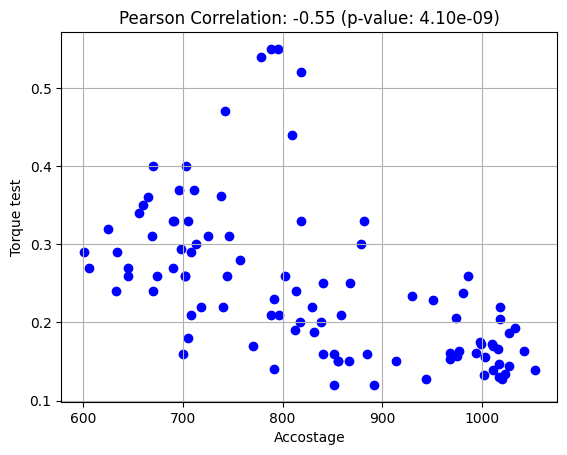

In [75]:
plt.scatter(x, y, color='blue')
plt.title(f"Pearson Correlation: {t_stat:.2f} (p-value: {p_value:.2e})")
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.grid()
plt.show()

In [ ]:
data = [2.1, 2.5, 1.8, 2.3, 2.7]
population_mean = 2.0

t_stat, p_value = stats.ttest_1samp(data, population_mean)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.7925163190605422, P-value: 0.1475177667972365


Division des 5 familles(avec famille non-identifié)

In [76]:
filename = r"../data/2024_11_28_Data_V1 - Copie.xlsx"

df = pd.read_excel(filename, sheet_name="Misalignment-Colle-Dégraissée",skiprows=[0])

df = df.iloc[:,:-2]
df

,Date de fab,n°,LOT Numero,Diamètre axe planétaire avant assemblage,Diamètre axe planétaire après assemblage,Diamètre cible,Serrage,Rayons axes,Accostage,Emmanchement,...,-0.05,std,0.1,0.2,0.3,0.4,0.5,Desalignement,Torque test,Date torque test
0,2024-07-02 00:00:00,1,NaN,2.013,2.013,1.94,0.073,Grand rayon,674.29,460.25,...,x,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.26,NaN
1,2024-07-02 00:00:00,2,NaN,2.011,2.012,1.94,0.071,Grand rayon,655.97,521.25,...,x,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.34,NaN
2,2024-07-02 00:00:00,3,NaN,2.013,2.013,1.94,0.073,Grand rayon,690.81,465.18,...,x,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.33,NaN
3,2024-07-02 00:00:00,4,NaN,2.012,2.011,1.94,0.072,Grand rayon,689.97,503.56,...,x,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.33,NaN
4,2024-07-02 00:00:00,5,NaN,2.011,2.012,1.94,0.071,Grand rayon,703.23,499.68,...,x,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,NaN,A0283204,240807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN
344,NaN,A0283201,240807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN
345,NaN,A0283200,240807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235,NaN
346,NaN,A0283198,240807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN


In [82]:
df[
    df["Dégraissée"] == "standard\n(avec graisse sur axe)"
   ].index

Index([107], dtype='int64')

In [126]:
_df = df.iloc[:107,:]

graissage = ["Dégraissée", "Collé", "Graissée"]
_df_index = _df.index

for ele in graissage:
    tmp = _df[_df[ele].notnull()].drop(columns=graissage)
    # tmp.to_excel(f"../data/tab_{ele}.xlsx", index=False)
    _df_index = _df_index.difference(tmp.index)
_df_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106],
      dtype='int64')

In [ ]:
normal_df = _df.iloc[_df_index,:].drop(columns=graissage)
normal_df.to_excel(f"../data/tab_Normale.xlsx", index=False)

In [120]:
non_id_df_index = df.index.difference(_df.index)
non_id_df_index

non_id_df = df.loc[non_id_df_index,:]
non_id_df.drop(columns=graissage).to_excel(f"../data/tab_Non_identifié.xlsx", index=False)